<a href="https://colab.research.google.com/github/aayushkubb/Deep_Learning_Tutorial/blob/master/Basics_of_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
churn=pd.read_csv("./Churn.csv")

In [ ]:
# What is the shape of the dataset?
# WHat are different catgeorical and numerical columns(features) in the data?
# What is the distribution of numerical data and the qualitative data.

# Problem Statement

In [ ]:
churn['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [ ]:
churn.groupby(by='Exited').mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [ ]:
churn.groupby(by='Exited').median()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,5042,15691543,653,36,5,92072.68,2,1,1,99645.04
1,4871,15688963,646,45,5,109349.29,1,1,0,102460.84


In [ ]:
churn[churn['Exited']==0].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7963.000000,7.963000e+03,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
std,2891.682053,7.174423e+04,95.653837,10.125363,2.880658,62848.040701,0.509536,0.455101,0.497045,57405.586966,0.0
min,2.000000,1.556570e+07,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.0
25%,2526.500000,1.562882e+07,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.490000,0.0
50%,5042.000000,1.569154e+07,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000,0.0
75%,7525.500000,1.575335e+07,718.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,1.000000,148609.955000,0.0
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


In [ ]:
churn[churn['Exited']!=0].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2037.000000,2.037000e+03,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,2866.855245,7.269262e+04,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,1.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,2419.000000,1.562736e+07,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,4871.000000,1.568896e+07,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,7404.000000,1.575309e+07,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,9999.000000,1.581566e+07,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


In [ ]:
churn.groupby(by='Exited').median()

# BAseline Model -1

In [ ]:
def baseline_model(row):
    '''A baseline model using just the age'''
    if row['Age'] >45:
        return 1
    else:
        return 0

In [ ]:
churn['predictions_baseline']=churn.apply(baseline_model,axis=1)

In [ ]:
churn['predictions_baseline'].value_counts(normalize=True)

0    0.7889
1    0.2111
Name: predictions_baseline, dtype: float64

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(churn['Exited'],churn['predictions_baseline']))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7963
           1       0.45      0.47      0.46      2037

    accuracy                           0.78     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.78      0.78      0.78     10000



# EDA

In [ ]:
## 1
df=churn.describe().T

In [ ]:
df['range']=df['max']-df['min']
df['iqr']=df['75%']-df['25%']

In [ ]:
df.sort_values(by='range')[['range','iqr','min','max']]

,range,iqr,min,max
HasCrCard,1.00,1.0000,0.00,1.00
IsActiveMember,1.00,1.0000,0.00,1.00
Exited,1.00,0.0000,0.00,1.00
predictions_baseline,1.00,0.0000,0.00,1.00
NumOfProducts,3.00,1.0000,1.00,4.00
Tenure,10.00,4.0000,0.00,10.00
Age,74.00,12.0000,18.00,92.00
CreditScore,500.00,134.0000,350.00,850.00
RowNumber,9999.00,4999.5000,1.00,10000.00
EstimatedSalary,199980.90,98386.1375,11.58,199992.48


In [ ]:
churn['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [ ]:
churn['NumOfProducts'].value_counts(normalize=True)

1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64

In [ ]:
churn['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
def check_Categorical(df,column_list,thresh=4):
    '''
    Accepts a dataframe and a list of columns and returns
    all the columns that are categorical based on threshold
    '''
    
    categorical=[]
    for i in column_list:
        print(i,df[i].nunique())
        if df[i].nunique() <=thresh:
            print(i," is categorical")
            categorical.append(i)
    return categorical
    

In [ ]:
check_Categorical(churn, churn.columns.tolist(),thresh=2)

RowNumber 10000
CustomerId 10000
Surname 2932
CreditScore 460
Geography 3
Gender 2
Gender  is categorical
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
HasCrCard  is categorical
IsActiveMember 2
IsActiveMember  is categorical
EstimatedSalary 9999
Exited 2
Exited  is categorical


['Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

In [ ]:
categorical_variables=check_Categorical(churn, churn.columns.tolist(),thresh=10)

RowNumber 10000
CustomerId 10000
Surname 2932
CreditScore 460
Geography 3
Geography  is categorical
Gender 2
Gender  is categorical
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
NumOfProducts  is categorical
HasCrCard 2
HasCrCard  is categorical
IsActiveMember 2
IsActiveMember  is categorical
EstimatedSalary 9999
Exited 2
Exited  is categorical
predictions_baseline 2
predictions_baseline  is categorical


In [ ]:
categorical_variables

['Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited',
 'predictions_baseline']

In [ ]:
numerical_variables=list(set(churn.columns.tolist())-set(categorical_variables))

In [ ]:
for i in numerical_variables:
    if churn[i].dtype==object:
        print(i)
        numerical_variables.remove(i)
    

Surname


# Visualization

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

<AxesSubplot:>

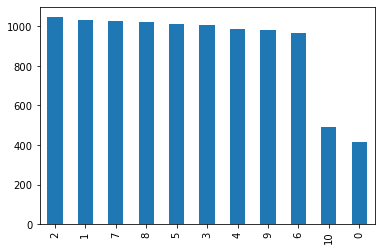

In [ ]:
churn['Tenure'].value_counts().plot.bar()

This is the variable:  CustomerId
count    1.000000e+04
mean     1.569094e+07
std      7.193619e+04
min      1.556570e+07
25%      1.562853e+07
50%      1.569074e+07
75%      1.575323e+07
max      1.581569e+07
Name: CustomerId, dtype: float64


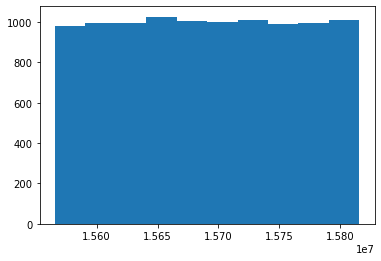

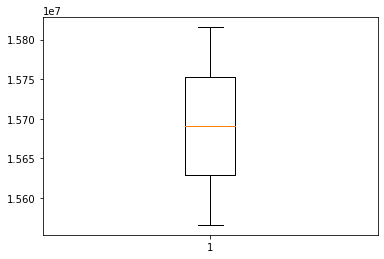

****************************************************************************************************
This is the variable:  Age
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


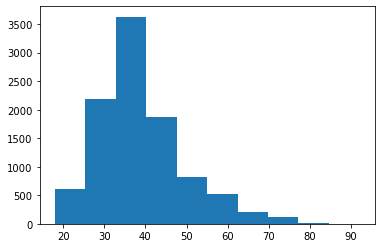

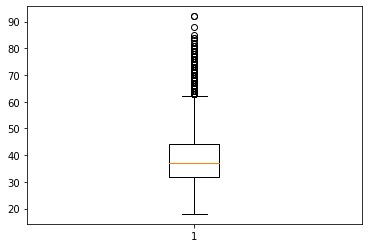

****************************************************************************************************
This is the variable:  Tenure
count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64


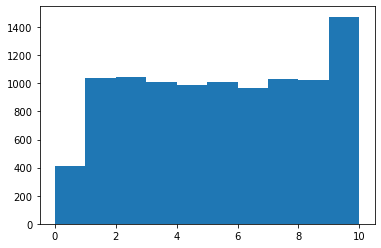

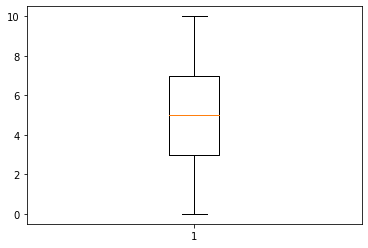

****************************************************************************************************
This is the variable:  EstimatedSalary
count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


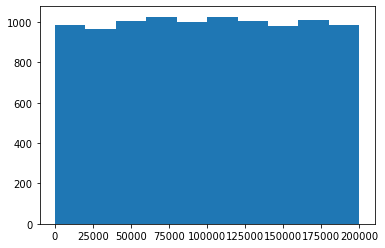

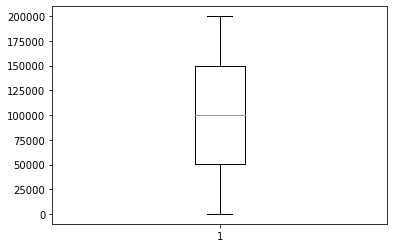

****************************************************************************************************
This is the variable:  CreditScore
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64


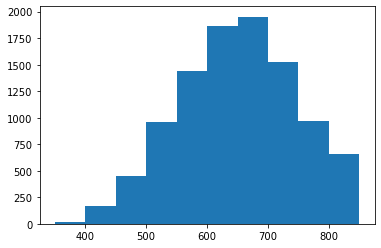

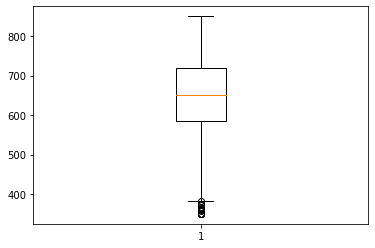

****************************************************************************************************
This is the variable:  Balance
count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64


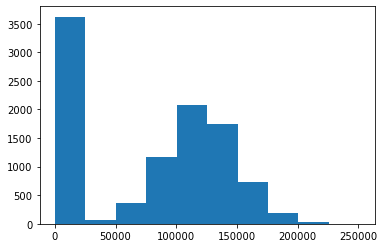

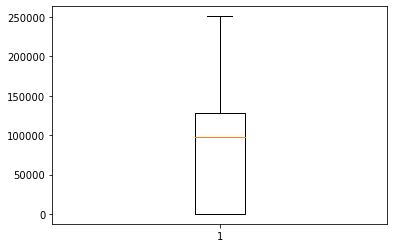

****************************************************************************************************
This is the variable:  RowNumber
count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
25%       2500.75000
50%       5000.50000
75%       7500.25000
max      10000.00000
Name: RowNumber, dtype: float64


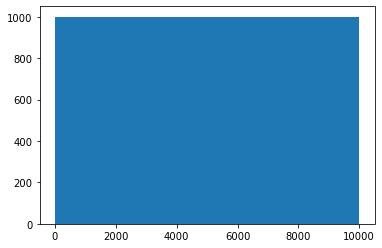

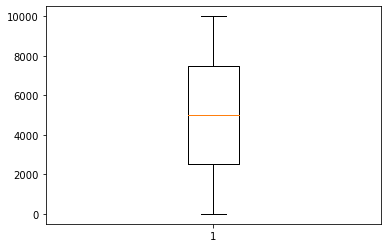

****************************************************************************************************


In [ ]:
for i in numerical_variables:
    print("This is the variable: ",i)
    print(churn[i].describe())
    plt.hist(churn[i])
    plt.show()
    plt.boxplot(churn[i])
    plt.show()
    print("*"*100)
    

In [ ]:
np.percentile(churn['Age'],q=99)

72.0

In [ ]:
(churn['Age']>80).value_counts()

False    9988
True       12
Name: Age, dtype: int64

This is the variable:  Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


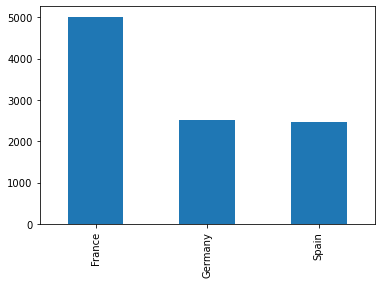

****************************************************************************************************
This is the variable:  Gender
Male      5457
Female    4543
Name: Gender, dtype: int64


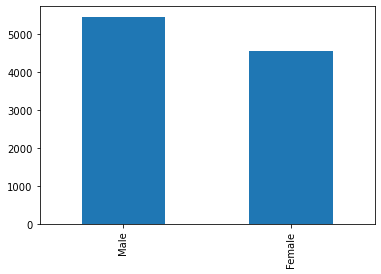

****************************************************************************************************
This is the variable:  NumOfProducts
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


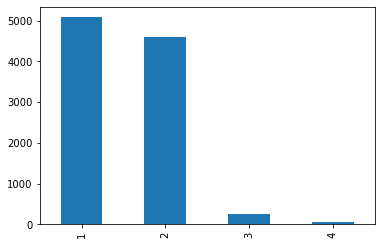

****************************************************************************************************
This is the variable:  HasCrCard
1    7055
0    2945
Name: HasCrCard, dtype: int64


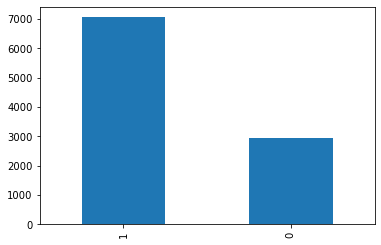

****************************************************************************************************
This is the variable:  IsActiveMember
1    5151
0    4849
Name: IsActiveMember, dtype: int64


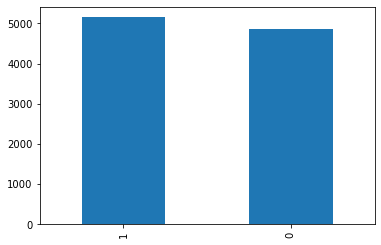

****************************************************************************************************
This is the variable:  Exited
0    7963
1    2037
Name: Exited, dtype: int64


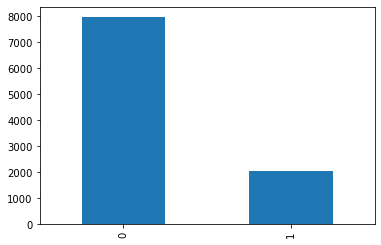

****************************************************************************************************
This is the variable:  predictions_baseline
0    7889
1    2111
Name: predictions_baseline, dtype: int64


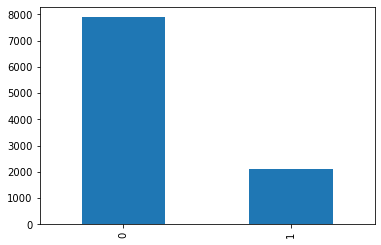

****************************************************************************************************


In [ ]:
for i in categorical_variables:
    print("This is the variable: ",i)
    print(churn[i].value_counts())
    churn[i].value_counts().plot.bar()
    plt.show()
    print("*"*100)
    

In [ ]:
churn.groupby(by='Geography')['Balance'].mean()

Geography
France      62092.636516
Germany    119730.116134
Spain       61818.147763
Name: Balance, dtype: float64

In [ ]:
churn.groupby(by='Geography')['Balance'].median()

Geography
France      62153.50
Germany    119703.10
Spain       61710.44
Name: Balance, dtype: float64

In [ ]:
churn.groupby(by='Geography')['Balance'].agg(['min',"max","mean","median"])

,min,max,mean,median
Geography,,,,
France,0.00,238387.56,62092.636516,62153.50
Germany,27288.43,214346.96,119730.116134,119703.10
Spain,0.00,250898.09,61818.147763,61710.44


In [ ]:
numerical_variables.remove('RowNumber')
numerical_variables.remove('CustomerId')

In [ ]:
categorical_variables.remove('predictions_baseline')

In [ ]:
for i in numerical_variables:
    print("---"*30)
    print("NUMERICAL is ",i)
    print("---"*30)
    for j in categorical_variables:
        
        print("CATEGORICAL is ",j)
        print(churn.groupby(by=j)[i].agg(['min',"max","mean","median"]))
        print("*"*50)

------------------------------------------------------------------------------------------
NUMERICAL is  Age
------------------------------------------------------------------------------------------
CATEGORICAL is  Geography
           min  max       mean  median
Geography                             
France      18   92  38.511767      37
Germany     18   84  39.771622      38
Spain       18   88  38.890997      37
**************************************************
CATEGORICAL is  Gender
        min  max       mean  median
Gender                             
Female   18   85  39.238389      38
Male     18   92  38.658237      37
**************************************************
CATEGORICAL is  NumOfProducts
               min  max       mean  median
NumOfProducts                             
1               18   92  39.673092      38
2               18   92  37.753595      36
3               21   77  43.195489      42
4               29   68  45.683333      45
**********************

In [ ]:
churn['CustomerId'].nunique()

10000

In [ ]:
num2_churn=churn[churn['NumOfProducts']==2]

In [ ]:
num2_churn['Exited'].value_counts(normalize=True)

0    0.924183
1    0.075817
Name: Exited, dtype: float64

In [ ]:
churn[churn['Geography']=='Germany'].sort_values(by='EstimatedSalary')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,predictions_baseline
2362,2363,15791053,Lucciano,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1,0
9010,9011,15786463,Hsing,645,Germany,Female,59,8,121669.93,2,0,0,91.75,1,1
1462,1463,15566211,Hsu,616,Germany,Female,41,1,103560.57,1,1,0,236.45,1,0
2046,2047,15733429,Chou,520,Germany,Male,34,8,120018.86,2,1,1,343.38,0,0
925,926,15636731,Ts'ai,714,Germany,Female,36,1,101609.01,2,1,1,447.73,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,119,15661670,Chidozie,524,Germany,Female,31,8,107818.63,1,1,0,199725.39,1,0
1986,1987,15772601,Lu,845,Germany,Female,41,2,81733.74,2,0,0,199761.29,0,0
6125,6126,15687913,Mai,501,Germany,Female,34,7,93244.42,1,0,1,199805.63,0,0
8088,8089,15815656,Hopkins,541,Germany,Female,39,9,100116.67,1,1,1,199808.10,1,0


In [ ]:
churn[churn['Age']>90]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6443,6444,15764927,Rogova,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,6760,15660878,T'ien,705,France,Male,92,1,126076.24,2,1,1,34436.83,0


In [ ]:
churn['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [ ]:
churn[churn['Age']>80]['Exited'].value_counts(normalize=True)

0    0.916667
1    0.083333
Name: Exited, dtype: float64

In [ ]:
churn['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [ ]:
churn[churn['Age']>70]['Exited'].value_counts(normalize=True)

0    0.917293
1    0.082707
Name: Exited, dtype: float64

In [ ]:
churn[churn['Age']<=70]['Exited'].value_counts(normalize=True)

0    0.794669
1    0.205331
Name: Exited, dtype: float64

In [ ]:
churn['senior']=churn['Age'].apply(lambda x: 1 if x>70 else 0)

In [ ]:
churn['senior'].value_counts()

0    9867
1     133
Name: senior, dtype: int64

In [ ]:
pd.pivot_table(churn,index='Geography',values=['Age','Balance'],aggfunc=['median','mean'],)

median                  mean               
             Age    Balance        Age        Balance
Geography                                            
France        37   62153.50  38.511767   62092.636516
Germany       38  119703.10  39.771622  119730.116134
Spain         37   61710.44  38.890997   61818.147763

In [ ]:
round(churn.loc[:,numerical_variables].corr()*10)

,Tenure,EstimatedSalary,CustomerId,CreditScore,Age,Balance,RowNumber
Tenure,10.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
EstimatedSalary,0.0,10.0,0.0,-0.0,-0.0,0.0,-0.0
CustomerId,-0.0,0.0,10.0,0.0,0.0,-0.0,0.0
CreditScore,0.0,-0.0,0.0,10.0,-0.0,0.0,0.0
Age,-0.0,-0.0,0.0,-0.0,10.0,0.0,0.0
Balance,-0.0,0.0,-0.0,0.0,0.0,10.0,-0.0
RowNumber,-0.0,-0.0,0.0,0.0,0.0,-0.0,10.0


In [ ]:
import seaborn as sns

<AxesSubplot:>

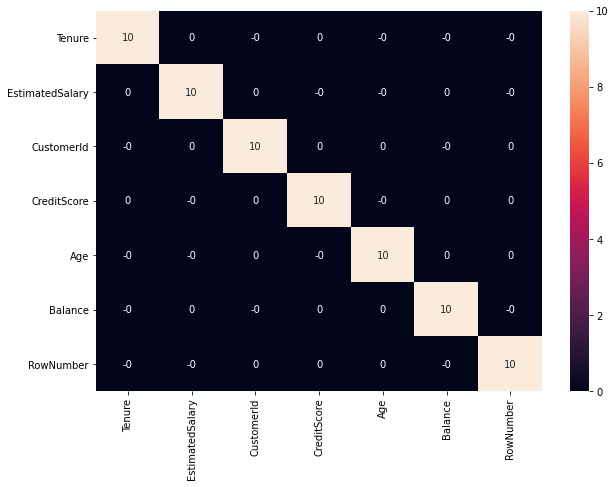

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(round(churn.loc[:,numerical_variables].corr()*10),annot=True)

<AxesSubplot:>

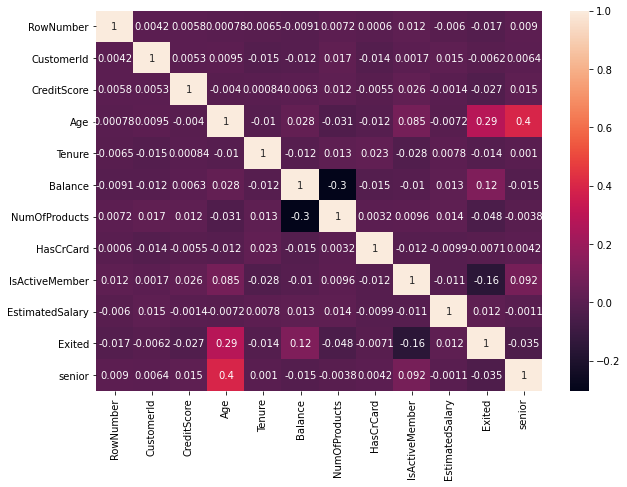

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(churn.corr(),annot=True)

In [ ]:
# split train test in 0.2 and 0.8 with random_state as 20

In [ ]:
# RF /DT

In [ ]:
# print its accuracy on test set

# Prepare the data for training

In [ ]:
churn_original=churn.copy()

In [ ]:
churn['Gender']=churn['Gender'].map({'Male':0,'Female':1}).astype(int)
churn['Geography']=churn['Geography'].map({'France':0,'Spain':1,'Germany':2}).astype(int)

In [ ]:
churn.drop(['Surname','RowNumber'],axis=1,inplace=True)

In [ ]:
X=churn.drop(['Exited','senior'],axis=1)
y=churn['Exited']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8635


In [ ]:
# clf=RandomForestClassifier(n_estimators=200)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train_sc,y_train)

# y_pred_sc=clf.predict(X_test_sc)

# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sc))

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:\n",metrics.classification_report(y_test, y_pred))

Accuracy:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1623
           1       0.73      0.43      0.54       377

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
X_train.shape, X_test.shape

In [ ]:
y_train.shape,y_test.shape

In [ ]:
import keras

In [ ]:
from keras.models import Sequential


In [ ]:
classifier=Sequential()

In [ ]:
from keras.layers import Dense

In [ ]:
#Input LAyer
classifier.add(Dense(11,activation='relu',input_dim=11))

#Hidden LAyers
classifier.add(Dense(6,activation='relu'))
classifier.add(Dense(6,activation='relu'))
classifier.add(Dense(6,activation='relu'))
classifier.add(Dense(6,activation='relu'))

#Output LAyer
classifier.add(Dense(1,activation='sigmoid'))



In [ ]:
classifier.summary()

In [ ]:
classifier.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=classifier.fit(X_train,y_train,epochs=10)

In [ ]:
#ffitting the model and training
history=classifier.fit(X_train,y_train,validation_split=0.3,batch_size=10,epochs=100)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
y_pred=(y_pred>0.5)

In [ ]:
metrics.accuracy_score(y_test, y_pred)